This notebook is from a course at [DataCamp](https://learn.datacamp.com/) called 'School Budgeting with Machine Learning in Python'

It is from a competion run by [DrivenData](https://www.drivendata.org/competitions/46/box-plots-for-education-reboot/page/85/) that has the following Summary:

> Budgets for schools and school districts are huge, complex, and unwieldy. It's no easy task to digest where and how schools are using their resources. Education Resource Strategies is a non-profit that tackles just this task with the goal of letting districts be smarter, more strategic, and more effective in their spending.

> Your task is a multi-class-multi-label classification problem with the goal of attaching canonical labels to the freeform text in budget line items. These labels let ERS understand how schools are spending money and tailor their strategy recommendations to improve outcomes for students, teachers, and administrators.

The dataset can be obtained by either joining the competition at DrivenData OR by using the `TrainingData.csv` from kaggle located here: [DrivenData's Box-Plots for Education Dataset](https://www.kaggle.com/jeromeblanchet/drivendatas-boxplots-for-education-dataset?select=TrainingData.csv)

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset `TrainingData.csv` which has been previously downloaded and stored locally
df = pd.read_csv('../Drivendata/TrainingData.csv', index_col=0)

In [3]:
# Examine the first 5 records of the dataset
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [4]:
# Obtain the 'info' and review datatypes and number of records (and missing records)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Function                400277 non-null  object 
 1   Use                     400277 non-null  object 
 2   Sharing                 400277 non-null  object 
 3   Reporting               400277 non-null  object 
 4   Student_Type            400277 non-null  object 
 5   Position_Type           400277 non-null  object 
 6   Object_Type             400277 non-null  object 
 7   Pre_K                   400277 non-null  object 
 8   Operating_Status        400277 non-null  object 
 9   Object_Description      375493 non-null  object 
 10  Text_2                  88217 non-null   object 
 11  SubFund_Description     306855 non-null  object 
 12  Job_Title_Description   292743 non-null  object 
 13  Text_3                  109152 non-null  object 
 14  Text_4         

In [5]:
# Print the summary statistics of the numeric columns 'FTE' and 'Total'
df.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


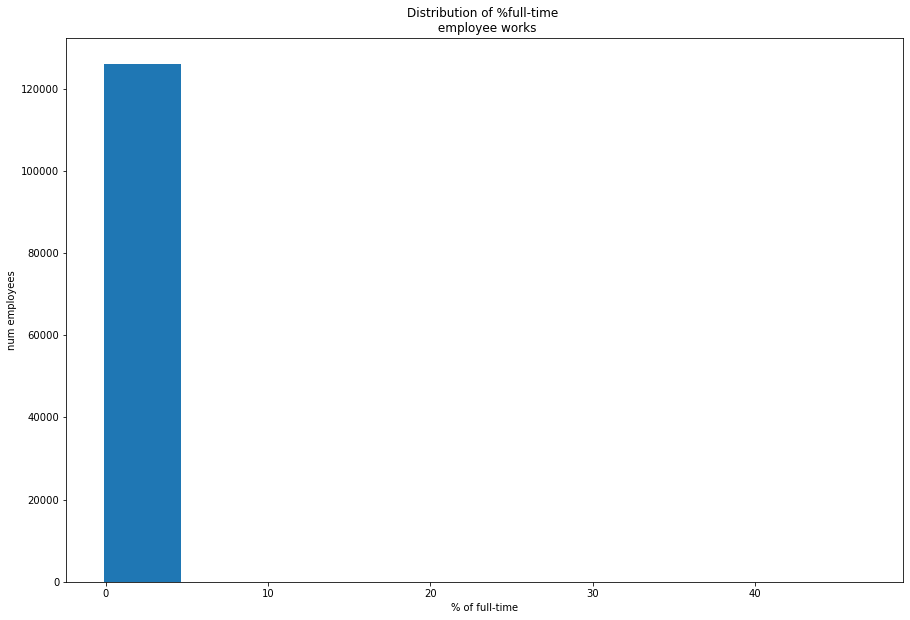

In [6]:
# Create a histogram of the 'FTE' column
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['FTE'].dropna())
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.show()

Clearly the FTE distribution has most of the values around '1' so let's segment out those values and see if we can replot to get some useful information

In [7]:
FTE_big = df.loc[df['FTE'] > 1.1]

In [8]:
len(FTE_big)

144

<AxesSubplot:xlabel='FTE', ylabel='Count'>

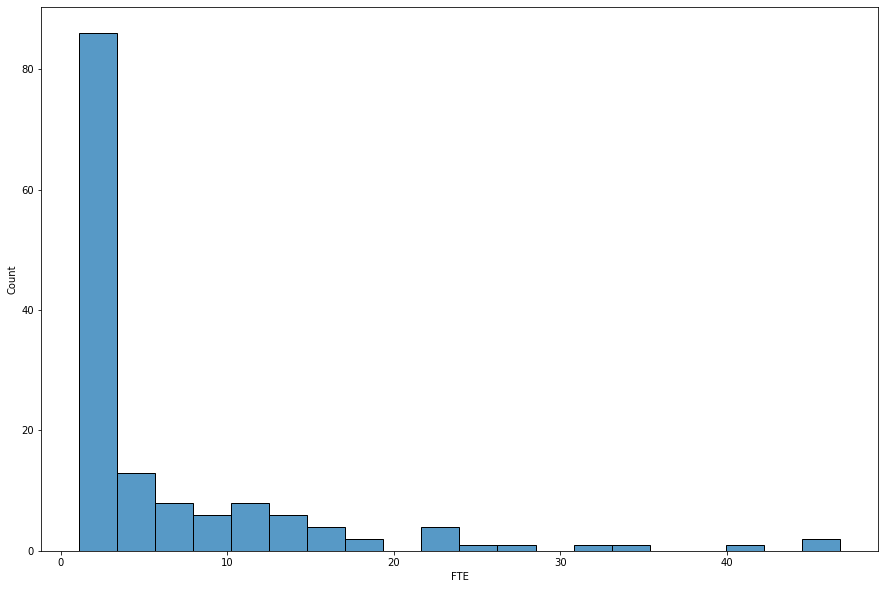

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(FTE_big, x='FTE', bins=20, ax=ax)

Now let's see if we can visualize the values less than 1.1

In [10]:
FTE_most = df.loc[df['FTE'] <= 1.1]